In [17]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def pad_to_size(img, target_width=512, target_height=512):
    original_height, original_width = img.shape[:2]
    scale_factor = target_width / original_width
    scaled_height = int(original_height * scale_factor)
    resized_img = cv2.resize(img, (target_width, scaled_height), interpolation=cv2.INTER_LINEAR)

    if scaled_height < target_height:
        delta_h = target_height - scaled_height
        top, bottom = delta_h // 2, delta_h - (delta_h // 2)
        padded_img = cv2.copyMakeBorder(resized_img, top, bottom, 0, 0, cv2.BORDER_CONSTANT, value=0)
    else:
        padded_img = resized_img

    return padded_img

def get_largest_blob(mask):
    _, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    if len(stats) > 1:
        largest_blob_index = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
        largest_blob = (labels == largest_blob_index).astype(np.uint8) * 255
    else:
        largest_blob = np.zeros_like(mask)
    return largest_blob

def calculate_accuracy(pred, gt):
    correct = np.sum(pred == gt)
    total = gt.size
    return correct / total

def calculate_iou(pred, gt):
    intersection = np.logical_and(pred, gt)
    union = np.logical_or(pred, gt)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def pad_to_size(img, target_width=512, target_height=512):
    original_height, original_width = img.shape[:2]
    scale_factor = target_width / original_width
    scaled_height = int(original_height * scale_factor)
    resized_img = cv2.resize(img, (target_width, scaled_height), interpolation=cv2.INTER_LINEAR)
    
    if scaled_height < target_height:
        delta_h = target_height - scaled_height
        top, bottom = delta_h // 2, delta_h - (delta_h // 2)
        padded_img = cv2.copyMakeBorder(resized_img, top, bottom, 0, 0, cv2.BORDER_CONSTANT, value=0)
    else:
        padded_img = resized_img
    return padded_img

def get_largest_blob(mask):
    _, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    if len(stats) > 1:
        largest_blob_index = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
        largest_blob = (labels == largest_blob_index).astype(np.uint8) * 255
    else:
        largest_blob = np.zeros_like(mask)
    return largest_blob

def calculate_iou(pred, gt):
    intersection = np.logical_and(pred > 0, gt > 0)
    union = np.logical_or(pred > 0, gt > 0)
    return np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0

def process_images(gt_directory, pred_directory):
    gt_files = os.listdir(gt_directory)
    pred_files = os.listdir(pred_directory)

    total_accuracy, total_iou, count = 0, 0, 0
    best_iou_scores = []

    for gt_file, pred_file in zip(gt_files, pred_files):
        gt_path = os.path.join(gt_directory, gt_file)
        pred_path = os.path.join(pred_directory, pred_file)

        gt_img = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
        pred_img = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)

        padded_gt_img = pad_to_size(gt_img)
        largest_blob = get_largest_blob(pred_img)

        iou_full_pred = calculate_iou(pred_img, padded_gt_img)
        iou_largest_blob = calculate_iou(largest_blob, padded_gt_img)
        
        best_iou = max(iou_full_pred, iou_largest_blob)
        best_iou_scores.append(best_iou)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(padded_gt_img, cmap='gray')
        plt.title('Ground Truth')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(pred_img, cmap='gray')
        plt.title(f'Full Pred\nIoU: {iou_full_pred:.4f}')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(largest_blob, cmap='gray')
        plt.title(f'Largest Blob\nIoU: {iou_largest_blob:.4f}')
        plt.axis('off')
        plt.show()

        total_iou += best_iou
        count += 1

    if count > 0:
        average_iou = total_iou / count
        print(f"Average Best IoU Score: {average_iou:.4f}")
    else:
        print("No files were processed.")


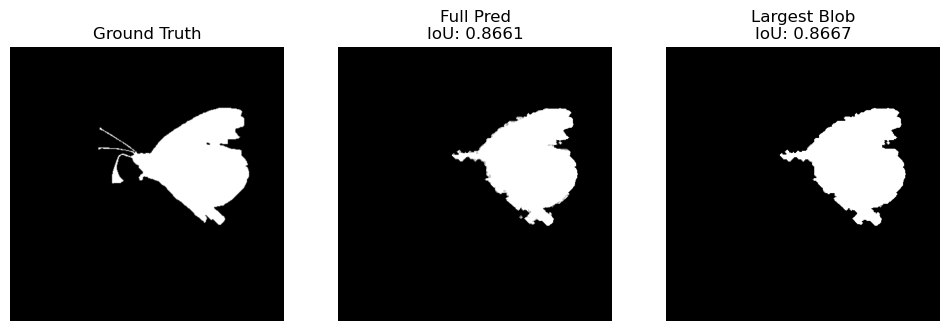

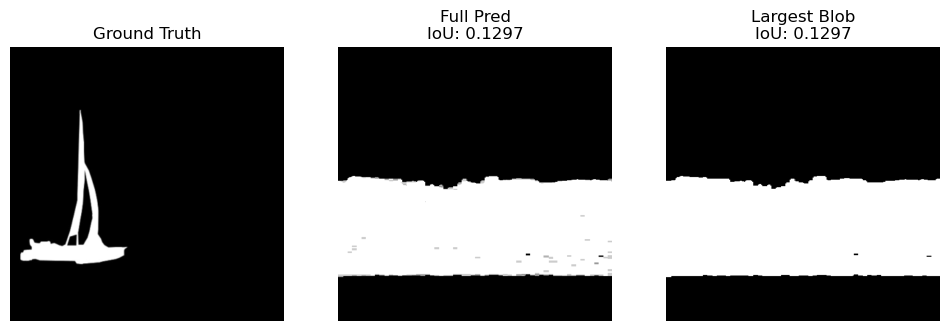

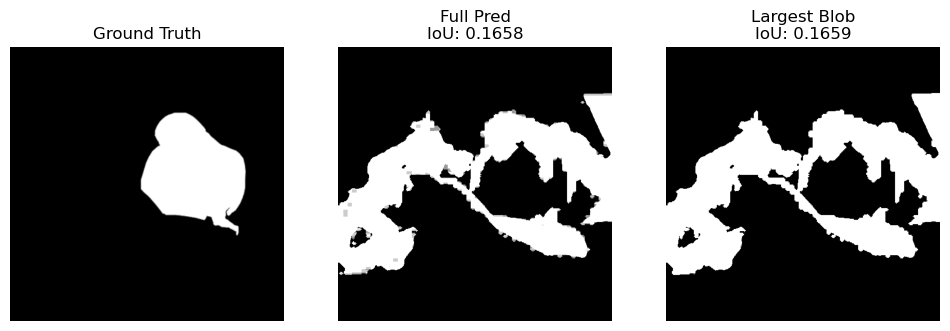

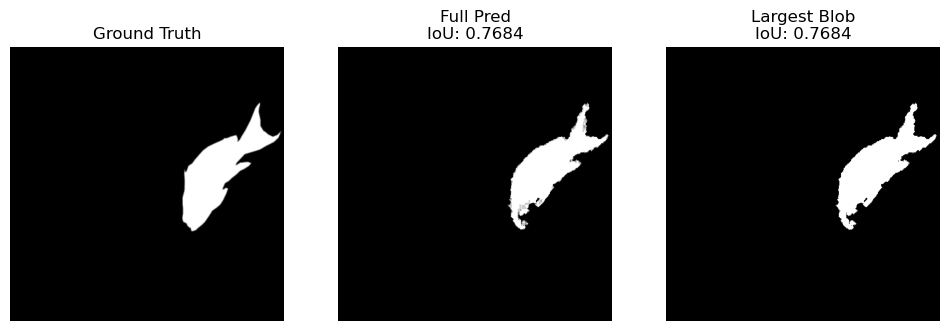

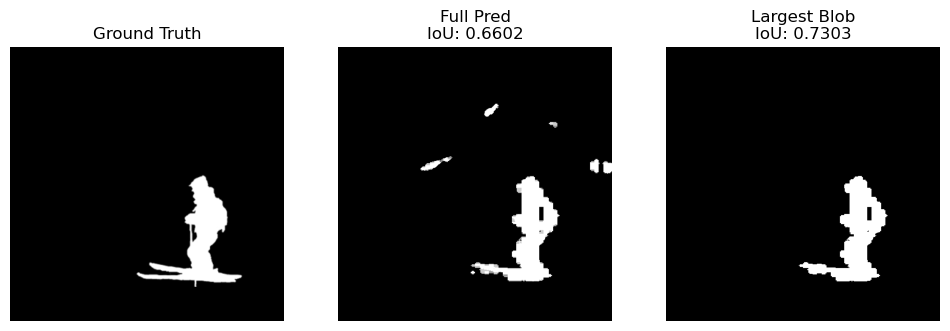

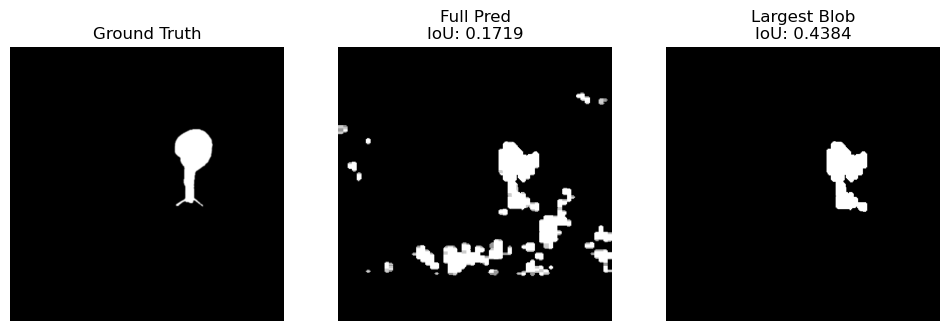

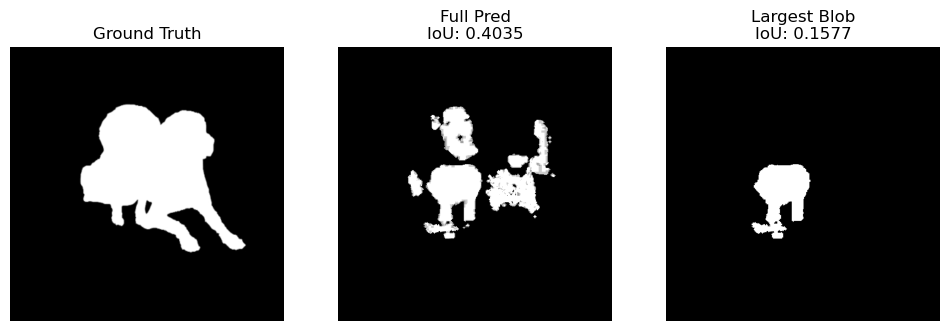

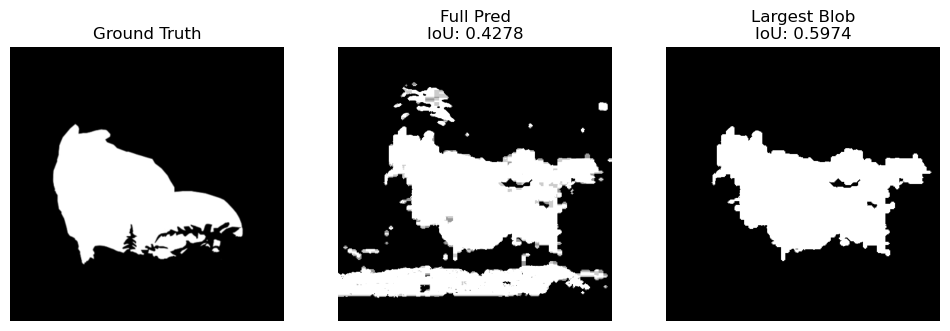

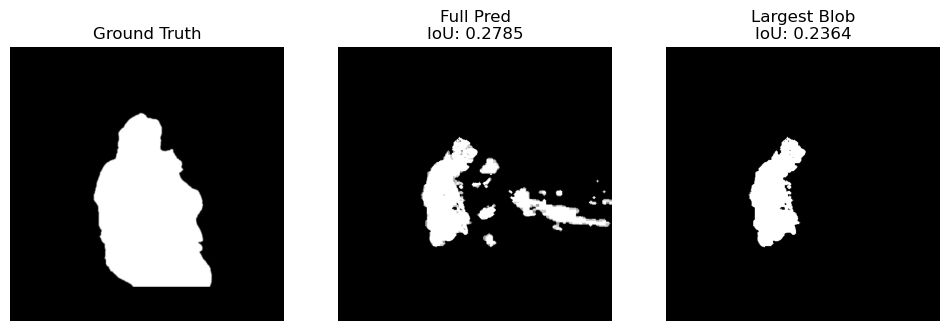

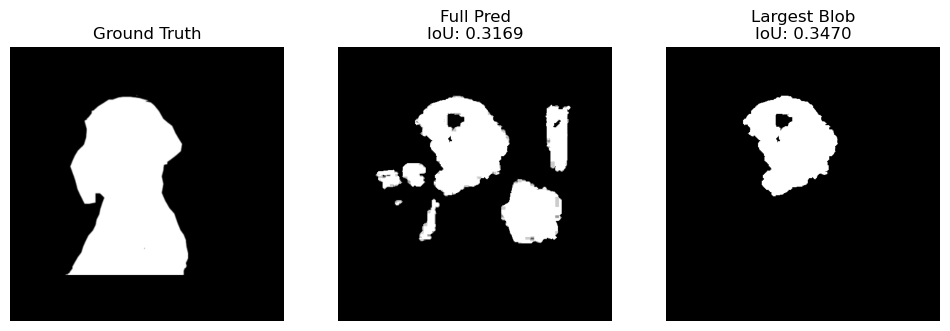

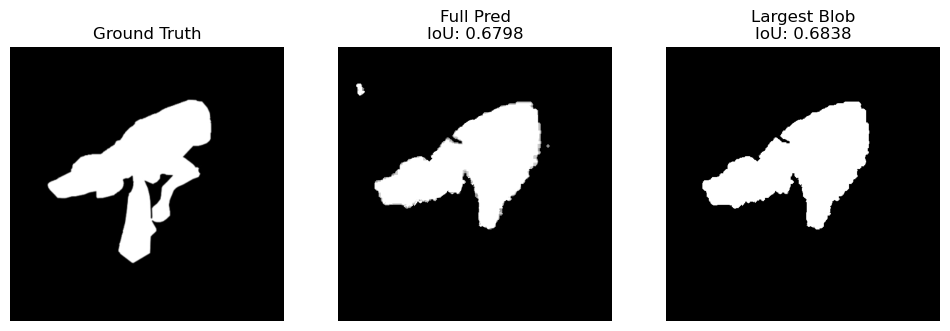

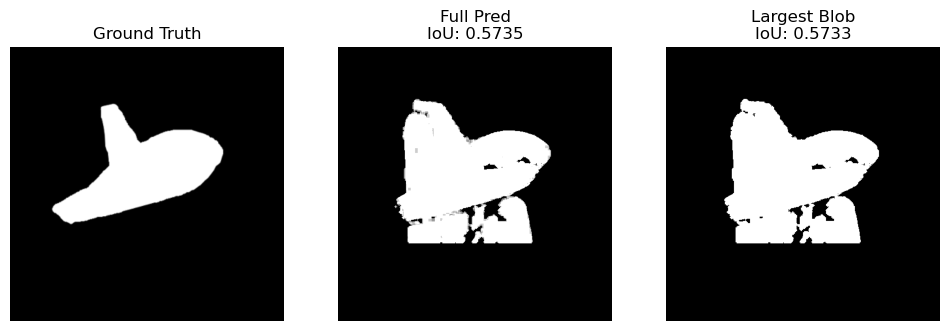

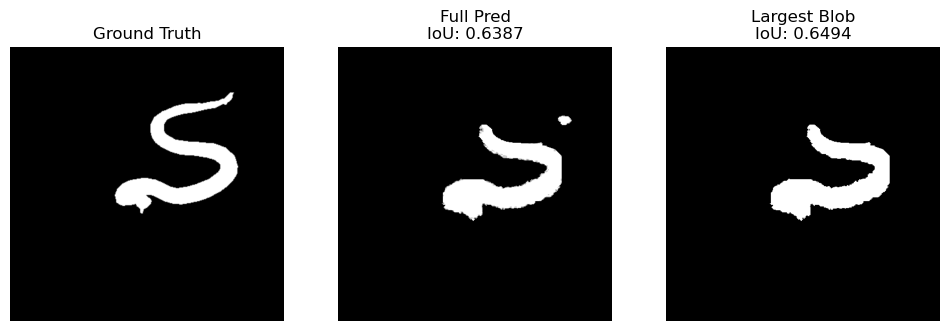

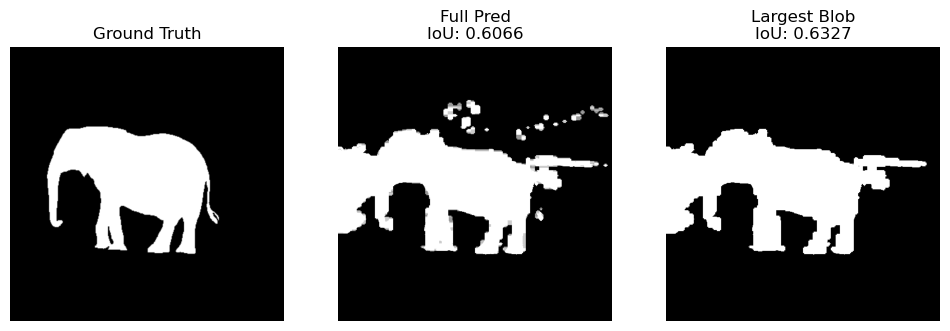

Average Best IoU Score: 0.5189


In [22]:
# Usage
base_directory = os.getcwd()
gt_directory = os.path.join(base_directory, 'Kmeans', 'GT')
pred_directory = os.path.join(base_directory, 'Kmeans', 'pred_coarse')
process_images(gt_directory, pred_directory)

C:\Users\prana\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Average Best IoU: nan%


C:\Users\prana\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\prana\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
